<div style="border-radius: 10px; border-style: solid; border-color: red;background-color: #fcf3cf; padding: 10pt">

# Laboratorio 2

*Números complejos - Parte 2: Fractales*

Diseño de la actividad y documento: Sergio Tello

**Estudiante:** Andres Felipe Parra Q.

</div>

## 1. Números complejos y fractales (tiempo total: 1 hora 30 minutos)

En esta actividad:

* Aprenderás cómo se define el conjunto de Mandelbrot.
* Construirás un mapa de bits y lo graficarás usando ```matplotlib```.
* Aplicarás tus conocimientos para graficar nuevos conjuntos fractales como los conjuntos de Julia.

### 1.1. El conjunto de Mandelbrot

A continuación verás un gráfico básico del conjunto de Mandelbrot ubicado sobre el plano complejo. Las anotaciones nos permiten entender qué puntos pertenecen al conjunto (puntos coloreados de blanco) y qué puntos no pertenecen (puntos coloreados de negro). Del diagrama también puedes hacerte una idea de la región que ocupa este fractal dentro de todo el plano complejo. Para más información sobre el conjunto de Mandelbrot, consultar la galería de imágenes y animaciones consulta la entrada correspondiente en Wikipedia (https://en.wikipedia.org/wiki/Mandelbrot_set).

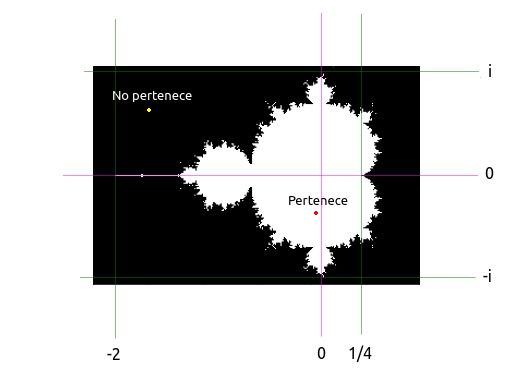

Para obtener una gráfico como éste, debemos crear un *mapa de bits* binario. Un mapa de bits binario es simplemente una matriz llena de ceros y unos. Los ceros corresponderán al color negro y los unos al color blanco. Para rellenar la matriz necesitaremos un procedimiento que nos diga si el punto sobre el plano representado por la entrada o casilla de la matriz está o no en el conjunto de Mandelbrot.

Pero primero empecemos con algo más sencillo. Vamos a crear una matriz de $5 \times 5$ y la usaremos para guardar un mapa de bits binario para la letra X. Usaremos la función ```ones``` de ```numpy``` para crear una matriz llena inicialmente con unos y que tenga el tamaño deseado.

In [10]:
import numpy as np

In [11]:
mapa_de_bits = np.ones((5, 5))

Usa ```print``` para visualizar la matriz ```mapa_de_bits```

In [12]:
# Ejecuta aquí el print indicado
print(mapa_de_bits)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


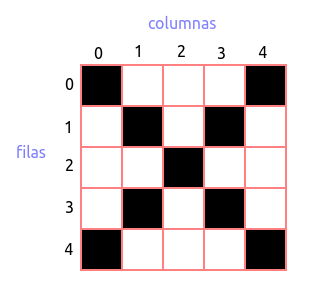

Ahora vamos a llenar la matriz con la información correspondiente a la letra X, como vemos en la figura de arriba. Observa en la celda de abajo que el primer índice se refiere a la fila y el segundo índice a la columna (tal y como siempre lo hemos convenido en álgebra lineal).

In [42]:
# Asignación de valores

mapa_de_bits[0][0] = 0
mapa_de_bits[0][4] = 0
mapa_de_bits[1][1] = 0
mapa_de_bits[1][3] = 0
mapa_de_bits[2][2] = 0
mapa_de_bits[3][3] = 0
mapa_de_bits[4][0] = 0
mapa_de_bits[4][4] = 0
mapa_de_bits[3][1] = 0

Muy bien, ahora sólo falta importar las herramientas de graficación matemática de la librería para la creación de gráficos ```matplotlib```. Importaremos esta librería con el alias ```plt```.

In [43]:
import matplotlib.pyplot as plt

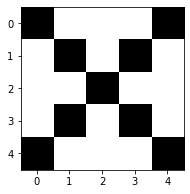

In [44]:
plt.figure(figsize=(3,3))
plt.imshow(mapa_de_bits, cmap='gray')
plt.show()

Completa la letra X agregando la asignación necesaria en la celda de *asignación de valores* de arriba, vuelve a ejecutar las celdas hasta este punto y verifica que la letra esté correcta.

<div style="background-color: #aed6f1; padding: 10pt">

**Reto 1.** 
    
Crea una nueva matriz de $5 \times 5$ y úsala para guardar y graficar la letra inicial de tu nombre o apellido.  
</div>

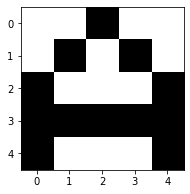

In [95]:
# Desarrolla el reto 1 en esta celda. Si necesitas más celdas las puedes insertar manualmente.
nombre = np.ones((5, 5))

nombre[0][2] = 0
nombre[1][1] = 0
nombre[1][3] = 0
nombre[2][0] = 0
nombre[2][4] = 0
nombre[3][0] = 0
nombre[3][1] = 0
nombre[3][2] = 0
nombre[3][3] = 0
nombre[3][4] = 0
nombre[3][0] = 0
nombre[4][0] = 0
nombre[4][4] = 0

plt.figure(figsize=(3,3))
plt.imshow(nombre, cmap='gray')
plt.show()

**Algoritmo de decisión para la pertenencia al conjunto de Mandelbrot**

Ahora sí, veamos cómo sería el proceso de decisión para determinar si un número complejo $c$ está o no en el conjunto de Mandelbrot.

Vamos a considerar la siguiente sucesión definida recursivamente:

$$\begin{cases} z_0 = 0 \\ z_{n+1} = z_n^2 + c  \end{cases}$$

Donde $c$ es el número complejo para el cual queremos determinar si está o no en el conjunto de Mandelbrot.

Considera el siguiente ejemplo:

El complejo $c = i$. Es decir, queremos determinar si $i$ está o no en el conjunto de Mandelbrot. Arrancamos con el valor semilla $z_0 = 0$.

Calculamos:

1. $z_1 = z_0^2 + c = 0^2 + i = i$

El valor obtenido $z_1 = i$ se tendrá en cuenta para el siguiente paso.

2. Calculamos ahora $z_ 2 = z_1^2 + c = i^2 + i = -1 + i$

El valor obtenido $z_2 = -1 + i$ se necesita para el siguiente paso.

3. Calculamos $z_ 3 = z_2^2 + c = (-1+i)^2 + i = 1 - 2i + i^2 + i = -i$

De este modo vemos que $z_3 = -i$, valor necesario para calcular el siguiente término.

4. Ahora calculamos $z_4 = z_3^2 + c = (-i)^2 + i = -1 + i$.

Hemos obtenido el valor $z_4 = -1 + i$ (observa que es igual a $z_2$).

5. Es fácil comprobar que $z_5 = -i$ (¡realiza la operación!).

Como ves, en este caso, la sucesión de los $z_n$ empieza a repetirse cíclicamente. Para determinar si el número $c$ está o no en el conjunto de Mandelbrot debemos hacer lo siguiente: 

1. Sacar el módulo de los números $z_n$
2. Si la sucesión de los módulos obtenidos no diverge al infinito, diremos que $c$ sí pertenece al conjunto de Mandelbrot, de lo contrario el número $c$ no pertenecerá al conjunto de Mandelbrot.

En el caso de nuetro ejemplo:

1. Los módulos son:

$|z_0| = 0$

$|z_1| = |i| = 1$

$|z_2| = |-1 + i| = \sqrt{2}$

$|z_3| = |-i| = 1$

$|z_4| = |-1 + i| = \sqrt{2}$

$|z_5| = |-i| = 1$

$\vdots$

2. La sucesión empieza a alternar sus valores entre $1$ y $\sqrt{2}$ por lo tanto no diverge al infinito (aunque sí es divergente). Eso quiere decir que $c = i$ sí pertenece al conjunto de Mandelbrot.

Para generar una gráfica en nuestro computador no podemos calcular toda la sucesión. El computador tampoco es capaz de reconocer patrones como el de repetición que hallamos en el ejemplo (si no lo entrenamos, claro). Entonces vamos a hacer dos simplificaciones:

* Calcularemos sólo 30 iteraciones (```tope_iteraciones```).
* Usaremos un resultado matemático que nos permite decir que la sucesión de los $z_n$ ya diverge al infinito si alguno de sus términos llega a tener un módulo mayor a 2.

<div style="background-color: #aed6f1; padding: 10pt">

**Reto 2.** 
    
Analiza cuidadosamente la siguiente función y verifica que sí entiendes por qué implementa el algoritmo descrito con las simplificaciones dadas arriba. Debes completar la línea solicitada.
    
</div>

In [37]:
# Completa el valor solicitado:
tope_iteraciones = 30

def esta_en_mandelbrot(c):
    '''
    Esta función recibe un número complejo c
    Retorna False si el número c no está en el conjunto de Mandelbrot
    Retorna True si el número c pertenece al conjunto de Mandelbrot
    '''
    z = 0 + 0*1j # Siempre el primer valor de z en la sucesión será z = 0.
    for i in range(tope_iteraciones):
        # Debes calcular el valor del nuevo término z, teniendo en cuenta la definición de la sucesión recursiva:
        z = z**2 +c
        
        # La condición de este if debe cumplirse cuando estemos seguros de que la sucesión va a ser divergente al 
        # infinito. Se retornará False cuando el numero c no pertenece al conjunto de Mandelbrot.
        # Completa la condición:
        if np.abs(z) > 2:
            return False
    # Si logramos salir del ciclo for, diremos que el número c sí está en el conjunto de Mandelbrot.
    return True

Usa la función anterior para observar y comparar si también acepta (como lo explicamos arriba) que el número $c = i$ está en el conjunto de Mandelbrot.

In [38]:
# Usa esta celda para realizar la prueba.
print(esta_en_mandelbrot(1j))

True


**Graficación**

Vamos a usar la función ```esta_en_mandelbrot``` para llenar nuestra matriz o mapa de bits binario. Usaremos un par de ```linspace``` de ```numpy``` para crear arreglos en donde irán los puntos del eje real y los puntos del eje imaginario que queremos graficar.

Primero observa el siguiente ejemplo:

In [39]:
dominio = np.linspace(3, 5, 10)
print(dominio)

[3.         3.22222222 3.44444444 3.66666667 3.88888889 4.11111111
 4.33333333 4.55555556 4.77777778 5.        ]


Como puedes ver, nos permite dividir el intervalo $[3, 5]$ en $10$ puntos igualmente espaciados. 

Continuamos: Asigna valores adecuados a las variables ```x_izquierda```, ```x_derecha```, ```y_arriba``` y ```y_abajo``` para la creación de nuestros dominios. Ten en cuenta que estos arreglos deben ser de números reales, por ahora no de números complejos. 

In [40]:
x_izquierda = -2
x_derecha = 1
y_arriba = 1
y_abajo = -1


dominio_real = np.linspace(x_izquierda, x_derecha, 300)
dominio_imaginario = np.linspace(y_abajo, y_arriba, 200)

<div style="background-color: #aed6f1; padding: 10pt">

**Reto 3.** 
    
Asigna correctamente el valor a la componente ```plano[s][t]``` de la celda siguiente. Posteriormente debes graficar el mapa de bits binario almacenado en ```plano```. ¿Cómo puedes mejorar la calidad de la gráfica obtenida?
    
</div>

In [68]:
plano = np.zeros((200, 300))

for s in range(len(dominio_imaginario)):
    for t in range(len(dominio_real)):
        c = dominio_real[t] + dominio_imaginario[s]*1j
        # Asigna correctamente un valor a la componente de la matriz 'plano' para que 
        # en este mapa de bits binario se almacene la gráfica del conjunto de Mandelbrot.
        plano[s][t] = esta_en_mandelbrot(c)

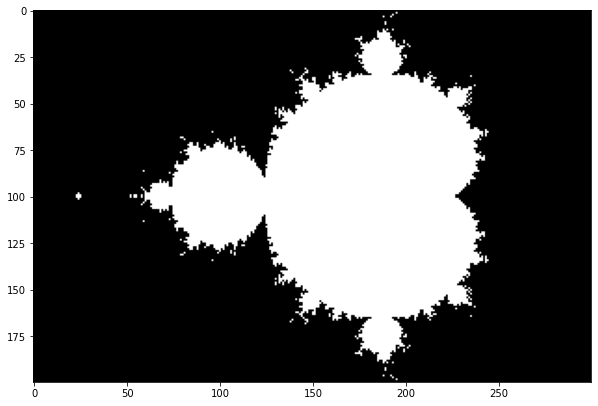

In [72]:
# Grafica aquí el mapa de bits almacenado en: plano
plt.figure(figsize=(10,10))
plt.imshow(plano, cmap='gray')

plt.show()

<div style="background-color: #aed6f1; padding: 10pt">

**Reto 4.** 
    
¿Qué modificaciones harías para lograr hacer *zoom in* en una región particular del conjunto de Mandelbrot?
    
</div>

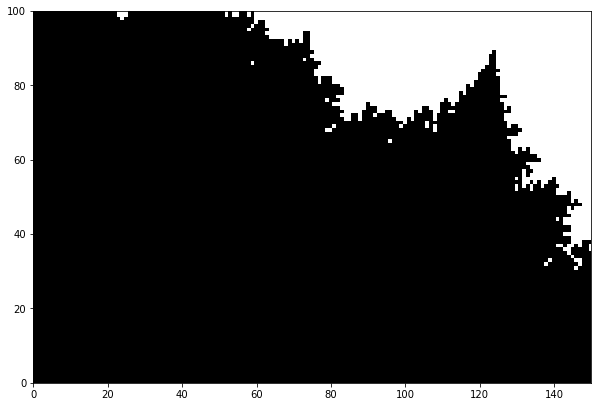

In [78]:
def zoom(x_min, x_max, y_min, y_max):
    plt.figure(figsize=(10,10))
    plt.axis([x_min, x_max, y_min, y_max])
    plt.imshow(plano, cmap='gray')

    plt.show()
    
zoom(0, 150, 0, 100)

### 1.2 Conjuntos de Julia

Una clase especial de conjuntos de Julia se consiguen de la siguiente manera:

* Se toma un número complejo (fijo) que pertenezca al conjunto de Mandelbrot (por ejemplo $c= -0.8i$).

Para cada número complejo $z$ en el plano se considera la siguiente sucesión:

$$\begin{cases} z_0 = z \\ z_{n+1} = z_n^2 + c  \end{cases}$$

Si para algún $z_n$ se tiene que $|z_n| > 2$, el número $z$ no pertenecerá al conjunto de Julia. De lo contrario, sí pertenecerá (puedes usar un tope de iteraciones igual a 30, como en el ejercicio anterior).

<div style="background-color: #aed6f1; padding: 10pt">

**Reto 5.** 
    
Tomando como punto de partida lo trabajado para el conjunto de Mandelbrot, implementa la graficación del conjunto de Julia para el valor $c = -0.8i$. (Implementa una función ```esta_en_julia```).
    
Puedes intentar posteriormente los siguientes valores de $c$:

* $-0.4 + 0.6i$
* $-0.8 + 0.156i$
* $0.285 + 0.01i$
    
</div>

In [89]:
# Desarrolla el reto 5 en esta celda y las que requieras adicionar.
tope_iteraciones = 30

def esta_en_julia(z):
    '''
    Esta función recibe un número imaginario z
    Retorna False si el número z no está en el conjunto de julia
    Retorna True si el número z pertenece al conjunto de julia
    '''
    c = -0.4+0.6j
    for i in range(tope_iteraciones):
        # Debes calcular el valor del nuevo término z, teniendo en cuenta la definición de la sucesión recursiva:
        z = z**2 + c
        
        # La condición de este if debe cumplirse cuando estemos seguros de que la sucesión va a ser divergente al 
        # infinito. Se retornará False cuando el numero z no pertenece al conjunto de julia.
        if np.abs(z) > 2:
            return False
    # Si logramos salir del ciclo for, diremos que el número c sí está en el conjunto de Mandelbrot.
    return True

In [90]:
print(esta_en_julia(1))

False


In [93]:
plano = np.zeros((200, 300))

for s in range(len(dominio_imaginario)):
    for t in range(len(dominio_real)):
        c = dominio_real[t] + dominio_imaginario[s]*1j
        # Asigna correctamente un valor a la componente de la matriz 'plano' para que 
        # en este mapa de bits binario se almacene la gráfica del conjunto de Mandelbrot.
        plano[s][t] = esta_en_julia(c)

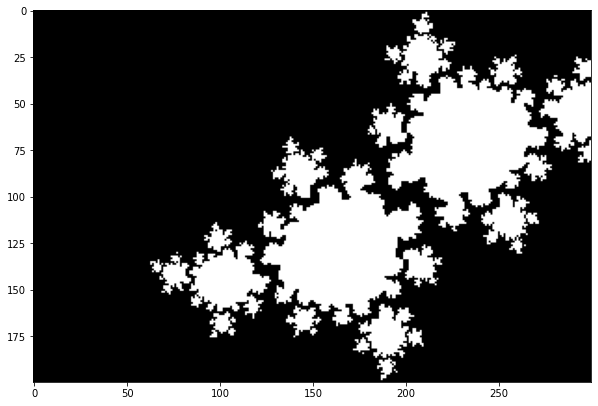

In [94]:
# Grafica aquí el mapa de bits almacenado en: plano
plt.figure(figsize=(10,10))
plt.imshow(plano, cmap='gray')

plt.show()

## Referencias

- **Conjunto de Mandelbrot**. https://en.wikipedia.org/wiki/Mandelbrot_set

- **Conjuntos de Julia**. https://en.wikipedia.org/wiki/Julia_set 

- **Matplotlib**. https://matplotlib.org/

- **NumPy**. https://numpy.org/

---

Sergio Tello - 2022